# Practical 7: Unsupervised Learning 


Upon completion of this session you should be able to:
- understand how K-Means, Hierarchical Clustering and Density-based Clustering algorithms work.
- be able to apply these unsupervised learning algorithms in Python.

---
- Materials in this module include resources collected from various open-source online repositories.
- Jupyter source file can be downloaded from https://github.com/gaoshangdeakin/SIT384-Jupyter
- If you found any issue/bug for this document, please submit an issue at [https://github.com/gaoshangdeakin/SIT384/issues](https://github.com/gaoshangdeakin/SIT384/issues)


---



This practical session will demonstrate different unsupervised learning algorithms: K-Means, Hierarchical Clustering and Density-based Clustering.


## Background



### Part 1 K-Means

1.1 [Generating Random Data](#data)

1.2 [Setting Up K-means](#kmeans)

1.3 [Creating the Visual Plot](#plot)

1.4 [Clustering Iris Data](#iris)


### Part 2 Hierarchical Clustering

2.1 [Generating Random Data](#data2)

2.2 [Agglomerative Clustering](#agc)

2.3 [Dendrogram](#den)
 
### Part 3 Density-based Clustering

## Tasks

## Summary

---

---
## <span style="color:#0b486b">1. K-Means Clustering</span>


### Import the following libraries:
<ul>
    <li> <b>random</b> </li>
    <li> <b>numpy as np</b> </li>
    <li> <b>matplotlib.pyplot as plt</b> </li>
    <li> <b>KMeans from sklearn.cluster</b> </li>
    <li> <b>make_blobs from sklearn.datasets.samples_generator</b> </li>
</ul>
<br>
Also run <b> %matplotlib inline </b> since we will be plotting in this section.

In [1]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

<a id = "data"></a>

### <span style="color:#0b486b">1.1 Generating Random Data</span>

So we will be creating our own dataset!

First we need to set up a random seed. Use <b>numpy's random.seed()</b> function, where the seed will be set to <b>0</b> <br>ex. random.seed(0)

In [2]:
np.random.seed(0)

Next we will be making <i> random clusters </i> of points by using the <b> make_blobs </b> class. The <b> make_blobs </b> class can take in many inputs, but we will be using these specific ones. <br> <br>
<b> <u> Input </u> </b>
<ul>
    <li> <b>n_samples</b>: The total number of points equally divided among clusters. </li>
    <ul> <li> Value will be: 5000 </li> </ul>
    <li> <b>centers</b>: The number of centers to generate, or the fixed center locations. </li>
    <ul> <li> Value will be: [[4, 4], [-2, -1], [2, -3],[1,1]] </li> </ul>
    <li> <b>cluster_std</b>: The standard deviation of the clusters. </li>
    <ul> <li> Value will be: 0.9 </li> </ul>
</ul>
<br>
<b> <u> Output </u> </b>
<ul>
    <li> <b>X</b>: Array of shape [n_samples, n_features]. (Feature Matrix)</li>
    <ul> <li> The generated samples. </li> </ul> 
    <li> <b>y</b>: Array of shape [n_samples]. (Response Vector)</li>
    <ul> <li> The integer labels for cluster membership of each sample. </li> </ul>
</ul>



In [3]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

Display the scatter plot of the randomly generated data.

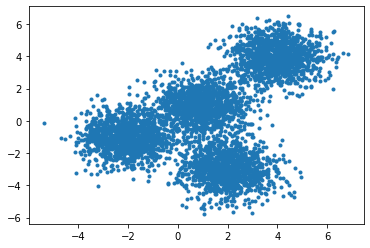

In [4]:
plt.scatter(X[:, 0], X[:, 1], marker='.')

#for testing purposes
#fig,ax = plt.subplots(figsize=(7, 7), dpi=100)
#ax.plot(X[:, 0], X[:, 1], 'k',
#            markerfacecolor=col, marker='.')


<a id = "kmeans"></a>


### <span style="color:#0b486b">1.2 Setting up K-means</span>

Now that we have our random data, let's set up our K-Means Clustering.

The KMeans class has many parameters that can be used, but we will be using these three:
<ul>
    <li> <b>init</b>: Initialization method of the centroids. </li>
    <ul>
        <li> Value will be: "k-means++" </li>
        <li> k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.</li>
    </ul>
    <li> <b>n_clusters</b>: The number of clusters to form as well as the number of centroids to generate. </li>
    <ul> <li> Value will be: 4 (since we have 4 centers)</li> </ul>
    <li> <b>n_init</b>: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia. </li>
    <ul> <li> Value will be: 12 </li> </ul>
</ul>

Initialize KMeans with these parameters, where the output parameter is called <b>k_means</b>.


In [5]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

Now let's fit the KMeans model with the feature matrix we created above, <b> X </b>

In [6]:
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Now let's grab the labels for each point in the model using KMeans' <b> .labels\_ </b> attribute and save it as <b> k_means_labels </b> 

In [7]:
k_means_labels = k_means.labels_
print(k_means_labels)

[0 3 3 ... 1 0 0]


We will also get the coordinates of the cluster centers using KMeans' <b> .cluster&#95;centers&#95; </b> and save it as <b> k_means_cluster_centers </b>

In [8]:
k_means_cluster_centers = k_means.cluster_centers_
print(k_means_cluster_centers)

[[-2.03743147 -0.99782524]
 [ 3.97334234  3.98758687]
 [ 0.96900523  0.98370298]
 [ 1.99741008 -3.01666822]]



<a id = "plot"></a>


### <span style="color:#0b486b">1.3 Creating the Visual Plot</span>

So now that we have the random data generated and the KMeans model initialized, let's plot them and see what it looks like!

Please read through the code and comments to understand how to plot the model.

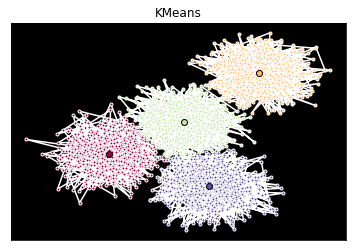

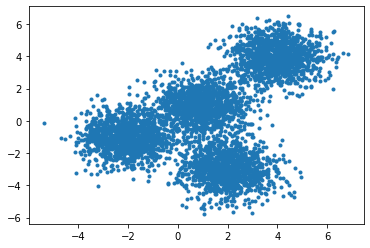

In [9]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot with a black background (background is black because we can see the points
# connection to the centroid.
ax = fig.add_subplot(1, 1, 1, facecolor = 'black')

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.

#print(np.linspace(0, 1, len(set(k_means_labels))))
#print('colors:',colors)
#print(range(len([[2, 2], [-2, -1], [4, -3], [1, 1]])))


for k, col in zip(range(len([[2, 2], [-2, -1], [4, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data points that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col. 'w'- white
    #https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.axes.Axes.plot.html 
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    #'o' circle marker; 'k' - black
    #for detail of format string, https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.axes.Axes.plot.html 
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()

# Display the scatter plot from above for comparison.
plt.scatter(X[:, 0], X[:, 1], marker='.')


<a id = "iris"></a>


### <span style="color:#0b486b">1.4 Clustering Iris Data</span>

Import the following libraries: 
<ol>- Axes3D from mpl_toolkits.mplot3d</ol>
<ol>- KMeans from sklearn.cluster</ol>
<ol>- load_iris from sklearn.datasets</ol>

<i>Note: It is presumed that numpy and matplotlib.pyplot are both imported as np and plt respectively from previous imports. If that is not the case, please import them!</i>

In [10]:
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.cluster import KMeans 
from sklearn.datasets import load_iris

Then we will set the <b>random seed</b> and the <b>centers</b> for <b>K-means</b>.

In [11]:
np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]

Using the <b> load_iris() </b> function, declare the iris datset as the variable <b>iris</b>

In [12]:
iris = load_iris()

Also declare <b>X</b> as the <b>iris' data component</b>, and y as <b>iris' target component</b>

In [13]:
X = iris.data 
y = iris.target

Now let's run the rest of the code and see what <b>K-Means produces!</b>

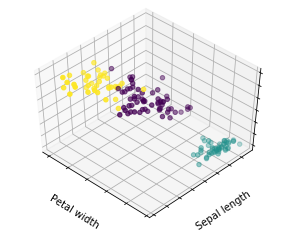

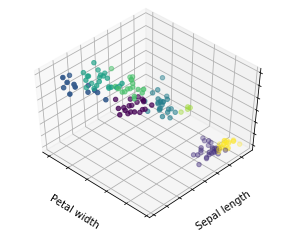

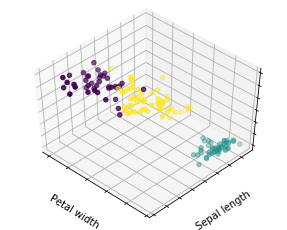

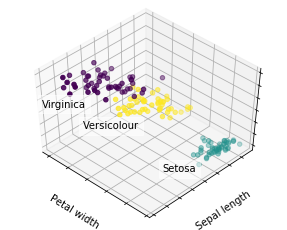

In [14]:
estimators = {'k_means_iris_3': KMeans(n_clusters=3),
              'k_means_iris_8': KMeans(n_clusters=8),
              'k_means_iris_bad_init': KMeans(n_clusters=3, n_init=1,
                                              init='random')}

fignum = 1
for name, est in estimators.items():
    fig = plt.figure(fignum, figsize=(4, 3))
    
    #plt.clf() clear the current figure
    #plt. clf() clears the entire current figure with all its axes, 
    #but leaves the window opened, such that it may be reused for other plots. 
    plt.clf()
    
    #https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    # plt.cla() clear the current axes
    plt.cla()
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float))

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
plt.show()

The following <b>plots</b> (1-3) show the different <b>end results</b> you obtain by using different <b>initalization processes</b>. <b>Plot 4</b> holds what the answer should be, however it is clear that <b>K-means</b> is <b>heavily reliant</b> on the <b>initalization</b> of the <b>centroid</b>.



---
## <span style="color:#0b486b">2. Hierarchical Clustering</span>


We will be looking at the next clustering technique, which is <b>Agglomerative Hierarchical Clustering, which is more popular than Divisive clustering.</b>. Remember that agglomerative is the bottom up approach. <br> <br>

We will also be using Complete Linkage as the Linkage Criteria. <br>
<b> <i> NOTE: You can also try using Average Linkage wherever Complete Linkage would be used to see the difference! </i> </b>

---
Import Libraries:
<ul>
    <li> <b>numpy as np</b> </li>
    <li> <b>ndimage</b> from <b>scipy</b> </li>
    <li> <b>hierarchy</b> from <b>scipy.cluster</b> </li>
    <li> <b>pyplot as plt</b> from <b>matplotlib</b> </li>
    <li> <b>manifold</b> from <b>sklearn</b> </li>
    <li> <b>datasets</b> from <b>sklearn</b> </li>
    <li> <b>AgglomerativeClustering</b> from <b>sklearn</b> </li>
    <li> <b>make_blobs</b> from <b>sklearn.datasets.samples_generator</b> </li>
</ul> <br>
Also run <b>%matplotlib inline</b> that that wasn't run already.

In [15]:
import numpy as np 
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

<a id = "data2"></a>

### <span style="color:#0b486b">2.1 Generating Random Data</span>

We will be generating another set of data using the <b>make_blobs</b> class once again. This time you will input your own values! <br> <br>
Input these parameters into make_blobs:
<ul>
    <li> <b>n_samples</b>: The total number of points equally divided among clusters. </li>
    <ul> <li> Choose a number from 10-1500 </li> </ul>
    <li> <b>centers</b>: The number of centers to generate, or the fixed center locations. </li>
    <ul> <li> Choose arrays of x,y coordinates for generating the centers. Have 1-10 centers (ex. centers=[[1,1], [2,5]]) </li> </ul>
    <li> <b>cluster_std</b>: The standard deviation of the clusters. The larger the number, the further apart the clusters</li>
    <ul> <li> Choose a number between 0.5-1.5 </li> </ul>
</ul> <br>
Save the result to <b>X2</b> and <b>y2</b>.

In [16]:
X2, y2 = make_blobs(n_samples=50, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)

Plot the scatter plot of the randomly generated data

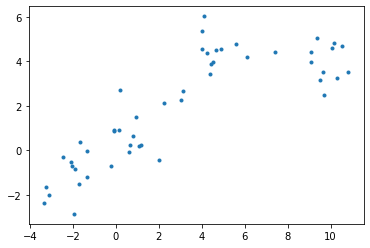

In [17]:
plt.scatter(X2[:, 0], X2[:, 1], marker='.') 

---
<a id = "agc"></a>

### <span style="color:#0b486b">2.2 Agglomerative Clustering</span>

We will start by clustering the random data points we just created.

The <b> AgglomerativeClustering </b> class will require two inputs:
<ul>
    <li> <b>n_clusters</b>: The number of clusters to form as well as the number of centroids to generate. </li>
    <ul> <li> Value will be: 4 </li> </ul>
    <li> <b>linkage</b>: Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion. </li>
    <ul> 
        <li> Value will be: 'complete' </li> 
        <li> <b>Note</b>: It is recommended you try everything with 'average' as well </li>
    </ul>
</ul> <br>
Save the result to a variable called <b> agglom </b>

In [18]:
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average')

Fit the model with <b> X2 </b> and <b> y2 </b> from the generated data above.

In [19]:
agglom.fit(X2,y2)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=4,
                        pooling_func='deprecated')

Run the following code to show the clustering! <br>
Remember to read the code and comments to gain more understanding on how the plotting works.

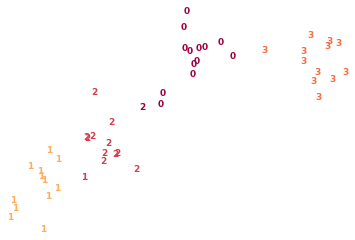

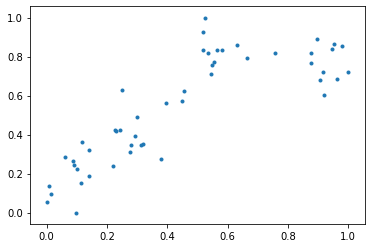

In [20]:
# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(6,4))

# These two lines of code are used to scale the data points down,
# Or else the data points will be scattered very far apart.

# Create a minimum and maximum range of X2.
x_min, x_max = np.min(X2, axis=0), np.max(X2, axis=0)

# Get the average distance for X2.
X2 = (X2 - x_min) / (x_max - x_min)

# This loop displays all of the datapoints.
#added by Shang
cmap = plt.cm.get_cmap("Spectral")

for i in range(X2.shape[0]):
    # Replace the data points with their respective cluster value 
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    #
    #"spectral usage: added by Shang
    #cmap = plt.cm.get_cmap("Spectral")
    #colors = cmap(a / b)
    #
    
    #plt.text(X2[i, 0], X2[i, 1], str(y2[i]),
    #         color=plt.cm.spectral(agglom.labels_[i] / 10.),
    #         fontdict={'weight': 'bold', 'size': 9})
        
    plt.text(X2[i, 0], X2[i, 1], str(y2[i]),
             color=cmap(agglom.labels_[i] / 10.), 
             fontdict={'weight': 'bold', 'size': 9})
    
# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
plt.axis('off')

# Display the plot
plt.show()

# Display the plot of the original data before clustering
plt.scatter(X2[:, 0], X2[:, 1], marker='.')

---
<a id = "den"></a>

### <span style="color:#0b486b">2.3 Dendrogram</span>


Remember that a <b>distance matrix</b> contains the <b> distance from each point to every other point of a dataset </b>. <br>
Use the function <b> distance_matrix, </b> which requires <b>two inputs</b>. Use the Feature Matrix, <b> X2 </b> as both inputs and save the distance matrix to a variable called <b> dist_matrix </b> <br> <br>
Remember that the distance values are symmetric, with a diagonal of 0's. This is one way of making sure your matrix is correct. <br> (print out dist_matrix to make sure it's correct)

In [30]:
dist_matrix = distance_matrix(X2,X2) 
print(dist_matrix)
#condense the distance matrix using hierarchy.distance.pdisk 
#you should see the condensed distance matrix is a flat array. 
#It is the upper triangular of the distance matrix.
condensed_dist_matrix= hierarchy.distance.pdist(X2,'euclidean')
print()
print(condensed_dist_matrix)

#the following is another way to produce condensed_dist_matrix
#import scipy.spatial.distance as ssd
## convert the redundant n*n square matrix form into a condensed nC2 array     
## distArray[{n choose 2}-{n-i choose 2} + (j-i-1)] is the distance between points i and j
##https://stackoverflow.com/questions/18952587/use-distance-matrix-in-scipy-cluster-hierarchy-linkage
#condensed_dist_matrix = ssd.squareform(dist_matrix)
#print()
#print(condensed_dist_matrix)

[[0.         0.08750199 0.12373912 ... 0.72939926 0.14221722 0.12149305]
 [0.08750199 0.         0.17893395 ... 0.73549091 0.13252706 0.20675124]
 [0.12373912 0.17893395 0.         ... 0.84295371 0.11197173 0.16143366]
 ...
 [0.72939926 0.73549091 0.84295371 ... 0.         0.8613293  0.70226941]
 [0.14221722 0.13252706 0.11197173 ... 0.8613293  0.         0.24061935]
 [0.12149305 0.20675124 0.16143366 ... 0.70226941 0.24061935 0.        ]]

[0.08750199 0.12373912 0.25732255 ... 0.8613293  0.70226941 0.24061935]

[0.08750199 0.12373912 0.25732255 ... 0.8613293  0.70226941 0.24061935]


Using the <b> linkage </b> class from hierarchy, pass in the parameters:
<ul>
    <li> The condensed distance matrix </li>
    <li> 'complete' for complete linkage </li>
</ul> <br>
Save the result to a variable called <b> Z </b>

In [22]:
Z = hierarchy.linkage(condensed_dist_matrix, 'complete')
#Z = hierarchy.linkage(X2, 'complete')

Next, we will save the dendrogram to a variable called <b>dendro</b>. In doing this, the dendrogram will also be displayed.
Using the <b> dendrogram </b> class from hierarchy, pass in the parameter:
<ul> <li> Z </li> </ul>

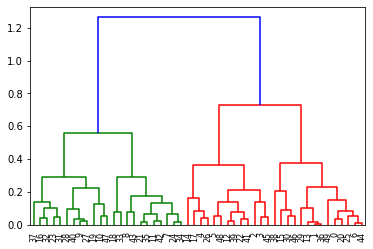

In [23]:
dendro = hierarchy.dendrogram(Z)

---
## <span style="color:#0b486b">3. Density-based Clustering</span>


We will be looking at the next clustering technique, which is <b>Agglomerative Hierarchical Clustering</b>. Remember that agglomerative is the bottom up approach. <br> <br>
In this lab, we will be looking at Agglomerative clustering, which is more popular than Divisive clustering. <br> <br>
We will also be using Complete Linkage as the Linkage Criteria. <br>
<b> <i> NOTE: You can also try using Average Linkage wherever Complete Linkage would be used to see the difference! </i> </b>

---
Import Libraries:
<ul>
    <li> <b>numpy as np</b> </li>
    <li> <b>ndimage</b> from <b>scipy</b> </li>
    <li> <b>hierarchy</b> from <b>scipy.cluster</b> </li>
    <li> <b>pyplot as plt</b> from <b>matplotlib</b> </li>
    <li> <b>manifold</b> from <b>sklearn</b> </li>
    <li> <b>datasets</b> from <b>sklearn</b> </li>
    <li> <b>AgglomerativeClustering</b> from <b>sklearn</b> </li>
    <li> <b>make_blobs</b> from <b>sklearn.datasets.samples_generator</b> </li>
</ul> <br>
Also run <b>%matplotlib inline</b> that that wasn't run already.

In [24]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
%matplotlib inline

The function below will generate the data points and requires these inputs:
<ul>
    <li> <b>centroidLocation</b>: Coordinates of the centroids that will generate the random data. </li>
    <ul> <li> Example: input: [[4,3], [2,-1], [-1,4]] </li> </ul>
    <li> <b>numSamples</b>: The number of data points we want generated, split over the number of centroids (# of centroids defined in centroidLocation) </li>
    <ul> <li> Example: 1500 </li> </ul>
    <li> <b>clusterDeviation</b>: The standard deviation between the clusters. The larger the number, the further the spacing. </li>
    <ul> <li> Example: 0.5 </li> </ul>
</ul>

In [25]:
def createDataPoints(centroidLocation, numSamples, clusterDeviation):
    # Create random data and store in feature matrix X and response vector y.
    X, y = make_blobs(n_samples=numSamples, centers=centroidLocation, 
                                cluster_std=clusterDeviation)
    
    # Standardize features by removing the mean and scaling to unit variance
    X = StandardScaler().fit_transform(X)
    return X, y

The function below will generate the DBSCAN using the input data:
<ul>
    <li> <b>epsilon</b>: A float that describes the maximum distance between two samples for them to be considered as in the same neighborhood. </li>
    <ul> <li> Example: 0.3 </li> </ul>
    <li> <b>minimumSamples</b>: The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself. </li>
    <ul> <li> Examples: 7 </li> </ul>
</ul>

In [26]:
def displayDBSCAN(epsilon, minimumSamples):
    
    # Initialize DBSCAN with specified epsilon and min. smaples. Fit the model with feature
    # matrix X
    db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
    
    # Create an array of booleans using the labels from db.
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    
    # Replace all elements with 'True' in core_samples_mask that are
    # in the cluster, 'False' if the points are outliers.
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)


    # Black color is removed and used for noise instead.
    
    # Remove repetition in labels by turning it into a set.
    unique_labels = set(labels)
    
    # Create colors for the clusters.
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    
    # Plot the points with colors
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = 'k'

        class_member_mask = (labels == k)
        
        # Plot the datapoints that are clustered
        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=14)

        # Plot the outliers
        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=6)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()

Use <b>createDataPoints</b> with the <b>3 inputs</b> and store the output into variables <b>X</b> and <b>y</b>.

In [27]:
createDataPoints([[4,3], [2,-1], [-1,4]] , 1500, 0.5)

(array([[-1.20481012,  0.8947502 ],
        [-1.33347483,  0.64553883],
        [ 0.63510302, -1.77670748],
        ...,
        [ 0.18916549, -1.41081505],
        [-1.11560064,  0.80583478],
        [-0.20255851, -1.16925803]]), array([2, 2, 1, ..., 1, 2, 1]))

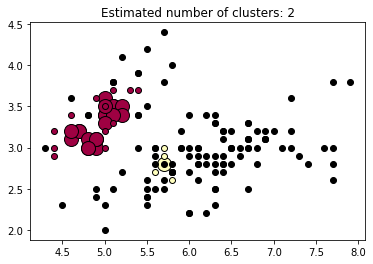

In [28]:
displayDBSCAN(0.3, 7)

# <span style="color:#0b486b">Tasks</span>

You may wish to <b>change</b> the values of <b>elev</b> and <b>azim</b> if you would like to view the graph in <b>different perspectives</b>. <b>Elev</b> controls the <b>elevation</b> of the <b>z plane</b> and <b>azim</b> controls the <b>azimuth angle</b> in the <b>x,y plane</b>.

Try the provided examples and get yourself familiar with sample code before attempting portolio tasks.

Please show your attempt to your tutor before you leave the lab, or email your files to your coordinator if you are an off-campus student.

# <span style="color:#0b486b">Summary</span>

In this session we have covered: 
 - different unsupervised learning algorithms.
 - how to apply the unsupervised learning algorithms in Python.